In [136]:

data = { 
    'lr': [],
    'lc1': [],
    'lc2': [],
    'lc3': [],
    'mf': [],
    'mq': [],
    'mt': [],
    'mr': [],
    'mp': [],
    'p': [], 
    'wt': [],
    'wf': [],
    'wp': [],
    'pr': [],
    'pi': [],
    'pc': []
}

name = "file.txt"
name = "test.txt"
counter = 0

with open(name, "r") as f:
    for i, l in enumerate(f.readlines()):
        if i < 28000:
            continue
        
        line = l.replace('\n', '')
        
        if name == "file.txt":
            splited = line.split('[] ')
            if len(splited) > 2:
                continue
            
            try:
                date = splited[0]
                data_ = splited[1].split(',')[1:]

            except:
                continue
        elif name == "test.txt":
            try:
                data_ = line.split(',')[1:]
                date = counter + 1
                counter += 1
            except:
                continue
        else:
            continue


        data__ = { 
            'lr': [],
            'lc1': [],
            'lc2': [],
            'lc3': [],
            'mf': [],
            'mq': [],
            'mt': [],
            'mr': [],
            'mp': [],
            'p': [], 
            'wt': [],
            'wf': [],
            'wp': [],
            'pr': [],
            'pi': [],
            'pc': []
        }
        for d in data_:
            try:
                type_ = d.split(':')[0]
                value = float(d.split(':')[1])

                if type_ in data:
                    if "lr" in type_:
                        v = value
                        if v > 7:
                            v = 0
                        data__[type_].append(v)
                    elif "p" == type_:
                        v = value
                        if v > 7:
                            v = 7
                        data__[type_].append(v)
                    elif "pr" in type_:
                        v = value
                        if v > 10:
                            v = 10
                        data__[type_].append(v)
                    else:
                        data__[type_].append(v)
            except:
                continue

        for d in data__:
            try:
                avg = sum(data__[d]) / len(data__[d])
                data[d].append((date, avg))
            except:
                data[d].append((date, -1.0))
                

(array([6884, 6885, 6886]),)
17896


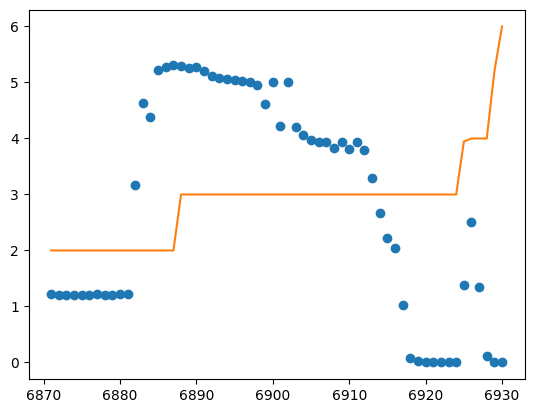

In [152]:
import matplotlib.pyplot as plt
import numpy as np

data_array_lr = np.array(data["lr"]) #[80000:90000]
data_array_p = np.array(data["p"]) #[80000:90000]
data_array_pr = np.array(data["pr"])

p_x = data_array_p[:,0]
p_y = data_array_p[:,1]

x = data_array_lr[:,0]
y = data_array_lr[:,1]

pr_x = data_array_pr[:,0]
pr_y = data_array_pr[:,1]

# print(y)
b = np.where( (y >= 4.9) & (y <= 5.1) )[0]
q = np.where( (y >= 4.9) & (y <= 5.5) & (p_y == 2))
print(q)
# print(len(b))
# print(b[:100])

up = 6870 # 6700 # 500000
low = 6930 # 7000
print(len(x))

x = x[up:low]
y = y[up:low]

p_x = p_x[up:low]
p_y = p_y[up:low]

pr_x = pr_x[up:low]
pr_y = pr_y[up:low]


plt.plot(x,y, 'o')
plt.plot(p_x,p_y)
# plt.plot(pr_x,pr_y)
